In [2]:
import pandas as pd

data_path = '../data/raw/IMDB Dataset.csv'
df = pd.read_csv(data_path)
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [4]:
print('Dataset info:    ')
print(df.info())
print('*'* 50)
print('Null values:    ')
print(df.isnull().sum())
print('*'* 50)
print('Label distribution:    ')
print(df['sentiment'].value_counts())

Dataset info:    
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
**************************************************
Null values:    
review       0
sentiment    0
dtype: int64
**************************************************
Label distribution:    
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


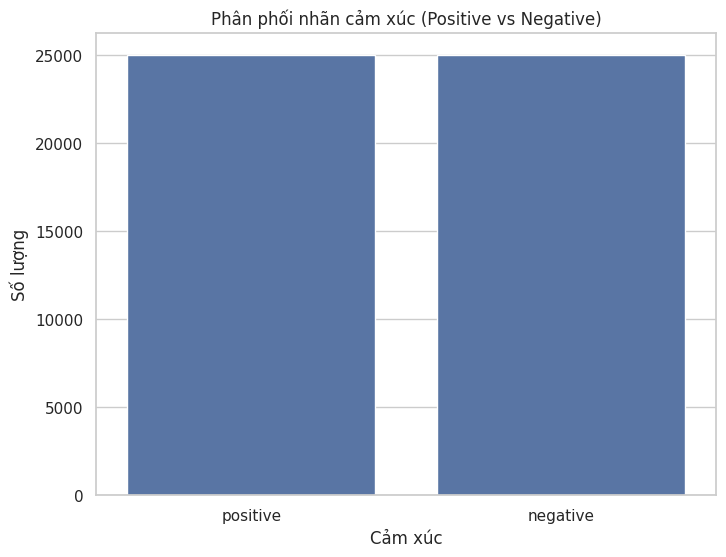

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập kiểu trực quan
sns.set(style="whitegrid")

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Phân phối nhãn cảm xúc (Positive vs Negative)')
plt.xlabel('Cảm xúc')
plt.ylabel('Số lượng')

# Lưu biểu đồ
plt.savefig('../results/sentiment_distribution.png')
plt.show()


Thống kê độ dài đánh giá:
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review_length, dtype: float64


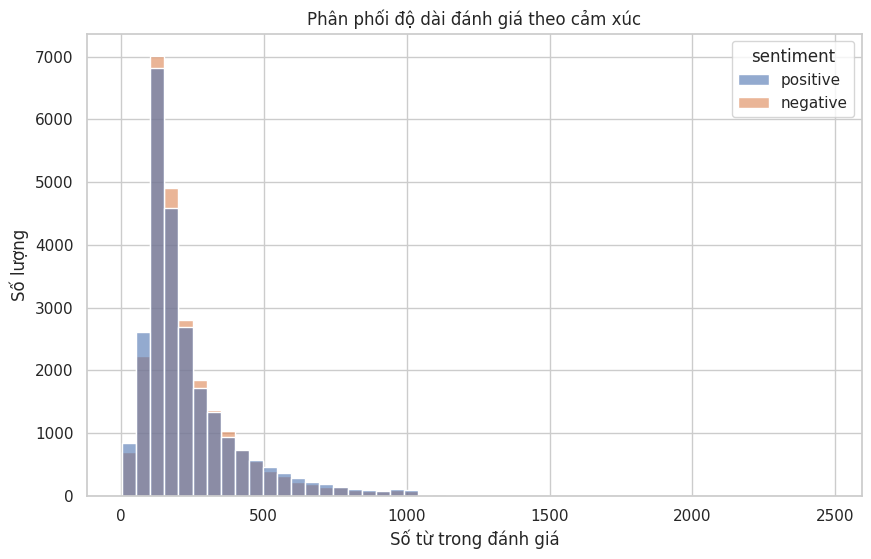

In [6]:
# Tính độ dài đánh giá (số từ)
df['review_length'] = df['review'].apply(lambda x: len(x.split()))

# Thống kê cơ bản
print("\nThống kê độ dài đánh giá:")
print(df['review_length'].describe())

# Vẽ histogram cho độ dài đánh giá theo cảm xúc
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_length', hue='sentiment', bins=50, alpha=0.6)
plt.title('Phân phối độ dài đánh giá theo cảm xúc')
plt.xlabel('Số từ trong đánh giá')
plt.ylabel('Số lượng')

# Lưu biểu đồ
plt.savefig('../results/review_length_distribution.png')
plt.show()

In [7]:
# Hiển thị 3 đánh giá tích cực và 3 đánh giá tiêu cực
print("\nMẫu đánh giá tích cực:")
display(df[df['sentiment'] == 'positive']['review'].head(3))

print("\nMẫu đánh giá tiêu cực:")
display(df[df['sentiment'] == 'negative']['review'].head(3))


Mẫu đánh giá tích cực:


0    One of the other reviewers has mentioned that ...
1    A wonderful little production. <br /><br />The...
2    I thought this was a wonderful way to spend ti...
Name: review, dtype: object


Mẫu đánh giá tiêu cực:


3    Basically there's a family where a little boy ...
7    This show was an amazing, fresh & innovative i...
8    Encouraged by the positive comments about this...
Name: review, dtype: object

In [17]:
import io
buf = io.StringIO()

df.info(buf=buf)
info_str = buf.getvalue()

# Lưu thống kê vào file
with open('../results/metrics.txt', 'w') as f:
    f.write("Thống kê dataset:\n")
    f.write(info_str + '\n\n')
    f.write("Phân phối nhãn cảm xúc:\n")
    f.write(str(df['sentiment'].value_counts()) + '\n\n')
    f.write("Thống kê độ dài đánh giá:\n")
    f.write(str(df['review_length'].describe()))


Thống kê số ký tự trong đánh giá:
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: review_char_count, dtype: float64


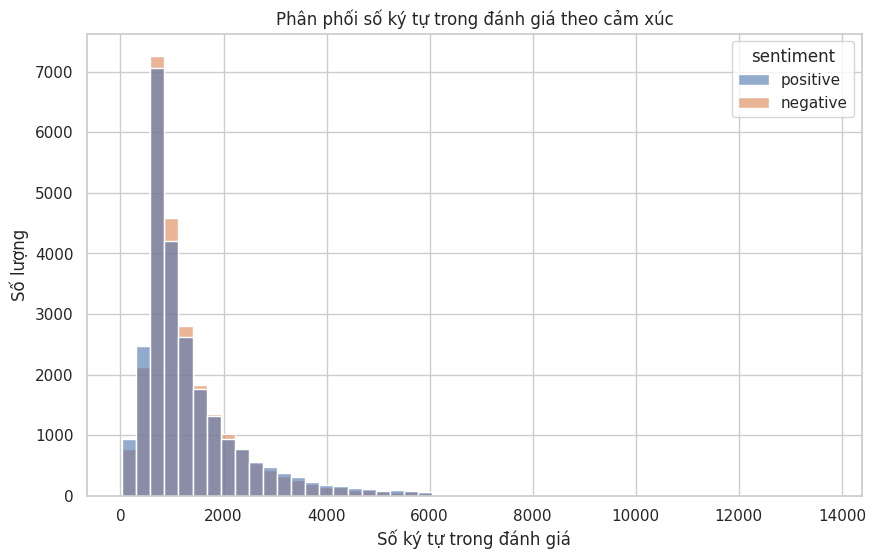

In [18]:
df['review_char_count'] = df['review'].apply(lambda x: len(x))

print("\nThống kê số ký tự trong đánh giá:")
print(df['review_char_count'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='review_char_count', hue='sentiment', bins=50, alpha=0.6)
plt.title('Phân phối số ký tự trong đánh giá theo cảm xúc')
plt.xlabel('Số ký tự trong đánh giá')
plt.ylabel('Số lượng')
plt.savefig('../results/review_char_count_distribution.png')
plt.show()

In [19]:
print(df.groupby('sentiment')['review_length'].mean())

sentiment
negative    229.46456
positive    232.84932
Name: review_length, dtype: float64
